In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
sales = pd.read_csv('../input/Bsales.csv')

In [33]:
sales.head(10)     #  show data

,Year,Product,Rep,Type,North,South,East,West
0,2016.0,3DS,NaBaGa,Act,0.00,0.00,0.05,0.00
1,2011.0,PSP,FaCo,Rol,0.00,0.00,0.02,0.00
2,2016.0,Wii,MaEn,Mis,0.14,0.11,0.00,0.03
3,2016.0,One,MaEn,Mis,0.17,0.05,0.00,0.02
4,2015.0,360,FiGa,Spo,0.00,0.16,0.00,0.02
5,2015.0,Wii,FiGa,Mis,0.00,0.07,0.00,0.01
6,2015.0,360,FiGa,Mis,0.00,0.06,0.00,0.01
7,2014.0,Wii,MaEn,Spo,1.54,1.07,0.00,0.28
8,2013.0,Wii,FiGa,Spo,3.50,2.64,0.00,0.67
9,2013.0,360,FiGa,Spo,1.74,0.48,0.00,0.18


In [16]:
sales.describe()      #   show data detail

,Year,North,South,East,West
count,16327.00000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2009.40626,0.264667,0.146652,0.077782,0.048063
std,5.82860,0.816683,0.505351,0.309291,0.188588
min,1983.00000,0.000000,0.000000,0.000000,0.000000
25%,2006.00000,0.000000,0.000000,0.000000,0.000000
50%,2010.00000,0.080000,0.020000,0.000000,0.010000
75%,2013.00000,0.240000,0.110000,0.040000,0.040000
max,2020.00000,41.490000,29.020000,10.220000,10.570000


---

📌 📌 **1. แสดงยอดขายรวมแยกรายปี (Year) และประเภทสินค้า (Type) โดยเอาเฉพาะปี 2006 เป็นต้นมา**

---

In [35]:
sales_2006 = sales.loc[sales['Year'] >= 2006]      #   select data that year is more than 2006
sales_2006

,Year,Product,Rep,Type,North,South,East,West
0,2016.0,3DS,NaBaGa,Act,0.00,0.00,0.05,0.00
1,2011.0,PSP,FaCo,Rol,0.00,0.00,0.02,0.00
2,2016.0,Wii,MaEn,Mis,0.14,0.11,0.00,0.03
3,2016.0,One,MaEn,Mis,0.17,0.05,0.00,0.02
4,2015.0,360,FiGa,Spo,0.00,0.16,0.00,0.02
...,...,...,...,...,...,...,...,...
16591,2013.0,PSP,NaBaGa,Rol,0.00,0.00,0.14,0.00
16593,2010.0,PTwo,NaBaGa,Rol,0.00,0.00,0.17,0.00
16594,2009.0,PTwo,NaBaGa,Rol,0.00,0.00,0.16,0.00
16595,2009.0,PTwo,NaBaGa,Rol,0.11,0.09,0.00,0.03


In [36]:
year_type_grp = sales_2006.groupby(['Year','Type'])    #   group data by year & type
table = year_type_grp.sum()                            #   find sum
table

North  South  East  West
Year   Type                          
2006.0 Act   37.74  20.88  4.19  5.17
       Adv    0.96   0.57  0.43  0.16
       Fig   13.32   5.78  2.95  1.74
       Mis   10.71   7.46  3.58  2.04
       Pla   25.31  12.50  2.22  2.79
...            ...    ...   ...   ...
2019.0 Spo    4.57   7.36  0.78  1.92
       Str    0.11   0.32  0.05  0.04
2020.0 Act    0.00   0.00  0.01  0.00
       Rol    0.00   0.00  0.04  0.00
       Sim    0.27   0.00  0.00  0.02

[170 rows x 4 columns]

In [37]:
table = table.reset_index()       #   reset index
table

,Year,Type,North,South,East,West
0,2006.0,Act,37.74,20.88,4.19,5.17
1,2006.0,Adv,0.96,0.57,0.43,0.16
2,2006.0,Fig,13.32,5.78,2.95,1.74
3,2006.0,Mis,10.71,7.46,3.58,2.04
4,2006.0,Pla,25.31,12.50,2.22,2.79
...,...,...,...,...,...,...
165,2019.0,Spo,4.57,7.36,0.78,1.92
166,2019.0,Str,0.11,0.32,0.05,0.04
167,2020.0,Act,0.00,0.00,0.01,0.00
168,2020.0,Rol,0.00,0.00,0.04,0.00


In [38]:
table['Total'] = table['North'] + table['South'] + table['East'] + table['West']    #   find total
table

,Year,Type,North,South,East,West,Total
0,2006.0,Act,37.74,20.88,4.19,5.17,67.98
1,2006.0,Adv,0.96,0.57,0.43,0.16,2.12
2,2006.0,Fig,13.32,5.78,2.95,1.74,23.79
3,2006.0,Mis,10.71,7.46,3.58,2.04,23.79
4,2006.0,Pla,25.31,12.50,2.22,2.79,42.82
...,...,...,...,...,...,...,...
165,2019.0,Spo,4.57,7.36,0.78,1.92,14.63
166,2019.0,Str,0.11,0.32,0.05,0.04,0.52
167,2020.0,Act,0.00,0.00,0.01,0.00,0.01
168,2020.0,Rol,0.00,0.00,0.04,0.00,0.04


In [42]:
#  build pivot table with index = year, column = type & find sum

pd.pivot_table(table,
               index = ['Year'], columns = ['Type'],
               values = ['Total'],
               aggfunc = np.sum,
               margins = True, fill_value = 0)

Total                                                          \
Type        Act     Adv     Fig     Mis     Pla     Puz     Rac     Rol   
Year                                                                      
2006.0    67.98    2.12   23.79   23.79   42.82    2.42   52.18   30.29   
2007.0    76.15    8.63   16.76   31.16   47.34    8.41   47.89   53.95   
2008.0    85.52    8.53   19.68   61.13   23.51   20.41   56.40   28.51   
2009.0    66.49   11.48   22.53   67.23   49.70   10.83   34.06   57.77   
2010.0   106.29   24.44   17.63   92.28   35.53   23.83   39.10   43.86   
2011.0   136.43   24.91   35.41   86.91   35.65   15.53   70.73   59.69   
2012.0   139.44   20.67   32.18   76.90   41.06   20.28   34.12   47.96   
2013.0   117.50   16.59   14.88   96.89   31.98   11.15   34.93   70.56   
2014.0   119.00   15.93   22.65   56.07   28.12    5.10   34.97   53.32   
2015.0   121.95    5.95    9.53   22.93   18.56    1.74   14.43   47.77   
2016.0   125.21    6.61    7.23   25.66   25.09    1.00   13.02   44.89   
2017.0    99.01    6.09   16.15   23.73    8.87    1.51   16.71   45.89   
2018.0    70.66    8.03    7.78   11.66    6.05    0.69    7.92   36.43   
2019.0    19.85    1.81    3.85    1.15    2.08    0.00    1.67    6.75   
2020.0     0.01    0.00    0.00    0.00    0.00    0.00    0.00    0.04   
All     1351.49  161.79  250.05  677.49  396.36  122.90  458.13  627.68   

                                                
Type       Sho     Sim     Spo    Str      All  
Year                                            
2006.0   27.10   21.21   55.96   7.95   357.61  
2007.0   46.92   10.89   63.61   7.14   418.85  
2008.0   41.57   49.28   59.53   5.34   459.41  
2009.0   38.35   21.73  136.12   4.23   520.52  
2010.0   70.99   48.85   98.24   9.40   610.44  
2011.0   59.51   46.78   95.24  11.70   678.49  
2012.0   69.84   33.55  138.59  12.51   667.10  
2013.0   77.44   22.10   92.52  13.82   600.36  
2014.0   99.35   15.33   57.06   9.03   515.93  
2015.0   72.84   13.37   30.90   3.33   363.30  
2016.0   62.73    8.68   41.54   6.32   367.98  
2017.0   65.99    5.54   46.64   0.97   337.10  
2018.0   66.12    5.61   41.49   1.82   264.26  
2019.0   18.17    0.39   14.63   0.52    70.87  
2020.0    0.00    0.29    0.00   0.00     0.34  
All     816.92  303.60  972.07  94.08  6232.56

---

📌 📌 **2. แสดงยอดขายรวมในภาคเหนือและภาคใต้ของพนักงานขายแต่ละคน โดยพิจารณาเฉพาะสินค้าสองตัวคือ 360 และ PS3 เฉพาะปี 2018-2019 และให้แสดงผลคอลัมน์จัดกลุ่มเป็น 2 ชั้นตามปีและสินค้า**

---

In [13]:
sales.head(10)      #   see data

,Year,Product,Rep,Type,North,South,East,West
0,2016.0,3DS,NaBaGa,Act,0.00,0.00,0.05,0.00
1,2011.0,PSP,FaCo,Rol,0.00,0.00,0.02,0.00
2,2016.0,Wii,MaEn,Mis,0.14,0.11,0.00,0.03
3,2016.0,One,MaEn,Mis,0.17,0.05,0.00,0.02
4,2015.0,360,FiGa,Spo,0.00,0.16,0.00,0.02
5,2015.0,Wii,FiGa,Mis,0.00,0.07,0.00,0.01
6,2015.0,360,FiGa,Mis,0.00,0.06,0.00,0.01
7,2014.0,Wii,MaEn,Spo,1.54,1.07,0.00,0.28
8,2013.0,Wii,FiGa,Spo,3.50,2.64,0.00,0.67
9,2013.0,360,FiGa,Spo,1.74,0.48,0.00,0.18


In [34]:
#  select data that year is 2018 & 2019

sales_2018_2019 = sales.loc[(sales['Year'] >= 2018) & (sales['Year'] <= 2019)]
sales_2018_2019

,Year,Product,Rep,Type,North,South,East,West
36,2019.0,PFour,Ub,Act,0.00,0.04,0.01,0.01
38,2018.0,PFour,ReDe,Sho,0.04,0.12,0.00,0.03
39,2018.0,One,ReDe,Sho,0.04,0.05,0.00,0.01
65,2019.0,3DS,AkGa,Adv,0.04,0.00,0.01,0.01
66,2019.0,PSV,AkGa,Adv,0.03,0.00,0.02,0.01
...,...,...,...,...,...,...,...,...
16491,2019.0,One,TeGa,Act,0.02,0.02,0.00,0.00
16511,2018.0,PSV,NaBaGa,Act,0.00,0.00,0.19,0.00
16512,2018.0,PS3,NaBaGa,Act,0.00,0.00,0.15,0.00
16515,2019.0,3DS,Se,Mis,0.02,0.00,0.00,0.00


In [35]:
#  select product is ps3 & xbox360

sales_condition = sales_2018_2019.loc[(sales_2018_2019['Product'] == 'PS3') | (sales_2018_2019['Product'] == '360')]
sales_condition

,Year,Product,Rep,Type,North,South,East,West
194,2018.0,PS3,TeKo,Rol,0.00,0.00,0.05,0.00
231,2018.0,PS3,Se,Act,0.00,0.00,0.25,0.00
234,2019.0,PS3,Se,Adv,0.00,0.00,0.12,0.00
318,2018.0,PS3,ArSyWo,Adv,0.01,0.00,0.00,0.00
393,2018.0,PS3,TaIn,Spo,0.21,0.27,0.00,0.09
...,...,...,...,...,...,...,...,...
15971,2018.0,PS3,TeKo,Act,0.00,0.00,0.05,0.00
16386,2019.0,PS3,PQ,Act,0.01,0.01,0.00,0.00
16396,2018.0,PS3,LiOr,Act,0.02,0.07,0.00,0.02
16397,2018.0,360,LiOr,Act,0.02,0.06,0.00,0.01


In [17]:
# build pivot table with index is rep, column is year, product & find sales sum of north, south

table = pd.pivot_table(sales_condition,
               index = ["Rep"], columns = ["Year","Product"],
               values = ["North","South"],
               aggfunc = {"North":np.sum,"South":np.sum},
               margins = True, fill_value = '')

table

North                            South                         
Year     2018.0       2019.0          All 2018.0       2019.0         All
Product     360   PS3    360   PS3           360   PS3    360   PS3      
Rep                                                                      
5p                  0                   0            0                  0
Ac         1.89  0.96   0.02  0.01   2.88   0.92  1.52   0.03  0.04  2.51
AlSo                       0     0      0                0.02  0.04  0.06
AqPl                0            0      0            0            0     0
ArSyWo           0.01                0.01            0                  0
BiIn          0  0.04                0.04   0.08  0.22                0.3
Ca         0.04  0.06            0    0.1   0.04  0.08            0  0.12
D3                  0                   0            0                  0
DeSi       0.15                      0.15      0                        0
DiInSt     0.19  0.14                0.33   0.21  0.25               0.46
ElAr       1.59  1.11   0.09  0.07   2.86   1.22  2.35   0.14   0.3  4.01
KaCr                0                   0            0                  0
KoDiEn     0.16  0.29            0   0.45   0.16  0.36         0.09  0.61
KoMe       0.21  0.11                0.32   0.16  0.28               0.44
LiOr       0.02  0.02                0.04   0.13  0.15               0.28
MiS.          0     0                   0   0.03  0.09               0.12
Mo         0.46  0.25                0.71   0.38  0.33               0.71
NaBaGa     0.16   0.2            0   0.36   0.08  0.39         0.02  0.49
Ni                  0                   0            0                  0
NiIcSo                        0.01   0.01                      0.02  0.02
PQ                  0         0.02   0.02            0         0.03  0.03
Se                  0            0      0            0            0     0
SoCoEn            0.3         0.13   0.43         0.01            0  0.01
SqEn       0.17  0.01            0   0.18   0.19     0            0  0.19
TaIn       1.04  0.65   0.04  0.03   1.76   0.29  0.46      0  0.01  0.76
TeGa       0.04  0.02            0   0.06   0.02  0.03         0.01  0.06
TeKo                0            0      0            0            0     0
TrBlEn        0     0                   0   0.03  0.03               0.06
Ub         0.28   0.1                0.38   0.15  0.14               0.29
Un                               0      0                         0     0
WaBrInEn   0.71  0.49   0.21  0.13   1.54   0.68  0.74   0.21  0.24  1.87
All        7.11  4.76   0.36   0.4  12.63   4.77  7.43    0.4   0.8  13.4

---

📌 📌 **3. ปรับขอบเขตข้อมูลในข้อที่แล้ว นั่นคือ พิจารณายอดขายรวม (ของทุกภาค) ของสินค้าสองตัว (คือ 360 และ PS3) ในปี 2018-2019 และ ให้นำเสนอเปรียบเทียบยอดขายสินค้า 5 ชนิด (Type) คือ Act, Adv, Fig, Rol และ Sho**

---

In [18]:
sales.head(10)      #   see data

,Year,Product,Rep,Type,North,South,East,West
0,2016.0,3DS,NaBaGa,Act,0.00,0.00,0.05,0.00
1,2011.0,PSP,FaCo,Rol,0.00,0.00,0.02,0.00
2,2016.0,Wii,MaEn,Mis,0.14,0.11,0.00,0.03
3,2016.0,One,MaEn,Mis,0.17,0.05,0.00,0.02
4,2015.0,360,FiGa,Spo,0.00,0.16,0.00,0.02
5,2015.0,Wii,FiGa,Mis,0.00,0.07,0.00,0.01
6,2015.0,360,FiGa,Mis,0.00,0.06,0.00,0.01
7,2014.0,Wii,MaEn,Spo,1.54,1.07,0.00,0.28
8,2013.0,Wii,FiGa,Spo,3.50,2.64,0.00,0.67
9,2013.0,360,FiGa,Spo,1.74,0.48,0.00,0.18


In [32]:
#  select data that year is 2018-2019

sales_2018_2019 = sales.loc[(sales['Year'] >= 2018) & (sales['Year'] <= 2019)]
sales_2018_2019

,Year,Product,Rep,Type,North,South,East,West
36,2019.0,PFour,Ub,Act,0.00,0.04,0.01,0.01
38,2018.0,PFour,ReDe,Sho,0.04,0.12,0.00,0.03
39,2018.0,One,ReDe,Sho,0.04,0.05,0.00,0.01
65,2019.0,3DS,AkGa,Adv,0.04,0.00,0.01,0.01
66,2019.0,PSV,AkGa,Adv,0.03,0.00,0.02,0.01
...,...,...,...,...,...,...,...,...
16491,2019.0,One,TeGa,Act,0.02,0.02,0.00,0.00
16511,2018.0,PSV,NaBaGa,Act,0.00,0.00,0.19,0.00
16512,2018.0,PS3,NaBaGa,Act,0.00,0.00,0.15,0.00
16515,2019.0,3DS,Se,Mis,0.02,0.00,0.00,0.00


In [33]:
#   select data that product is xbox360 or ps3

sales_conditions = sales_2018_2019.loc[(sales_2018_2019['Product'] == '360') | (sales_2018_2019['Product'] == 'PS3')]
sales_conditions

,Year,Product,Rep,Type,North,South,East,West
194,2018.0,PS3,TeKo,Rol,0.00,0.00,0.05,0.00
231,2018.0,PS3,Se,Act,0.00,0.00,0.25,0.00
234,2019.0,PS3,Se,Adv,0.00,0.00,0.12,0.00
318,2018.0,PS3,ArSyWo,Adv,0.01,0.00,0.00,0.00
393,2018.0,PS3,TaIn,Spo,0.21,0.27,0.00,0.09
...,...,...,...,...,...,...,...,...
15971,2018.0,PS3,TeKo,Act,0.00,0.00,0.05,0.00
16386,2019.0,PS3,PQ,Act,0.01,0.01,0.00,0.00
16396,2018.0,PS3,LiOr,Act,0.02,0.07,0.00,0.02
16397,2018.0,360,LiOr,Act,0.02,0.06,0.00,0.01


In [34]:
#   select data that type is act, adv, fig, rol & sho

table = sales_conditions.loc[(sales_conditions['Type'] == 'Act') | (sales_conditions['Type'] == 'Adv') | (sales_conditions['Type'] == 'Fig') | (sales_conditions['Type'] == 'Rol') | (sales_conditions['Type'] == 'Sho')]
table

,Year,Product,Rep,Type,North,South,East,West
194,2018.0,PS3,TeKo,Rol,0.00,0.00,0.05,0.00
231,2018.0,PS3,Se,Act,0.00,0.00,0.25,0.00
234,2019.0,PS3,Se,Adv,0.00,0.00,0.12,0.00
318,2018.0,PS3,ArSyWo,Adv,0.01,0.00,0.00,0.00
664,2018.0,PS3,TeKo,Act,0.00,0.00,0.02,0.00
...,...,...,...,...,...,...,...,...
15971,2018.0,PS3,TeKo,Act,0.00,0.00,0.05,0.00
16386,2019.0,PS3,PQ,Act,0.01,0.01,0.00,0.00
16396,2018.0,PS3,LiOr,Act,0.02,0.07,0.00,0.02
16397,2018.0,360,LiOr,Act,0.02,0.06,0.00,0.01


In [35]:
#  build pivot table with index is product, type & find sum of region

table = pd.pivot_table(table,
               index = ["Product", "Type"],
               values = ["North", "South", "East", "West"],
               aggfunc = {"North" : np.sum, "South" : np.sum, "East" : np.sum, "West" : np.sum},
               fill_value = 0)

table

East  North  South  West
Product Type                          
360     Act   0.00   1.70   1.63  0.32
        Adv   0.00   0.67   0.59  0.11
        Fig   0.00   0.16   0.08  0.02
        Sho   0.00   1.51   0.75  0.22
PS3     Act   2.51   1.42   2.08  0.67
        Adv   0.23   0.28   0.37  0.12
        Fig   0.26   0.16   0.22  0.08
        Rol   1.03   0.06   0.11  0.04
        Sho   0.16   0.77   1.37  0.40

In [36]:
table['Total'] = table['North'] + table['South'] + table['East'] + table['West']   #  insert total column
table

East  North  South  West  Total
Product Type                                 
360     Act   0.00   1.70   1.63  0.32   3.65
        Adv   0.00   0.67   0.59  0.11   1.37
        Fig   0.00   0.16   0.08  0.02   0.26
        Sho   0.00   1.51   0.75  0.22   2.48
PS3     Act   2.51   1.42   2.08  0.67   6.68
        Adv   0.23   0.28   0.37  0.12   1.00
        Fig   0.26   0.16   0.22  0.08   0.72
        Rol   1.03   0.06   0.11  0.04   1.24
        Sho   0.16   0.77   1.37  0.40   2.70

In [37]:
table = table.reset_index()     #   reset index
table

,Product,Type,East,North,South,West,Total
0,360,Act,0.00,1.70,1.63,0.32,3.65
1,360,Adv,0.00,0.67,0.59,0.11,1.37
2,360,Fig,0.00,0.16,0.08,0.02,0.26
3,360,Sho,0.00,1.51,0.75,0.22,2.48
4,PS3,Act,2.51,1.42,2.08,0.67,6.68
5,PS3,Adv,0.23,0.28,0.37,0.12,1.00
6,PS3,Fig,0.26,0.16,0.22,0.08,0.72
7,PS3,Rol,1.03,0.06,0.11,0.04,1.24
8,PS3,Sho,0.16,0.77,1.37,0.40,2.70


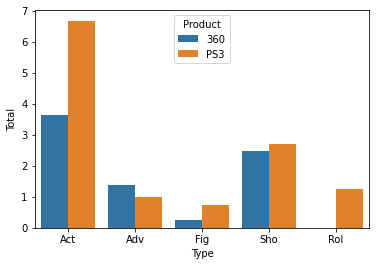

In [39]:
sns.barplot(x = 'Type', y = 'Total', data = table, hue = 'Product', ci = False)   #  plot chart